In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf
from datetime import datetime as dt

In [77]:
start="2021-06-01"
end="2021-09-01"

In [78]:
JPM=yf.download("JPM", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [79]:
JPM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,165.869995,166.910004,165.479996,166.050003,164.109711,9445400
2021-06-02,167.259995,167.440002,165.529999,166.059998,164.119583,10498600
2021-06-03,165.410004,167.250000,164.660004,166.169998,164.228287,13354400
2021-06-04,166.210007,166.669998,165.029999,166.440002,164.495148,8510800
2021-06-07,167.000000,167.100006,165.139999,165.660004,163.724258,7267200


In [80]:
def SMA(data, window, column):
    return data[column].rolling(window=window).mean()
JPM["SMA_20"]=SMA(JPM,window=20, column="Close")

In [81]:
(JPM["High"]+JPM["Low"]+JPM["Close"])/3

Date
2021-06-01    166.146667
2021-06-02    166.343333
2021-06-03    166.026667
2021-06-04    166.046666
2021-06-07    165.966670
                 ...    
2021-08-25    160.166667
2021-08-26    162.243332
2021-08-27    162.490000
2021-08-30    161.270004
2021-08-31    160.223333
Length: 65, dtype: float64

In [82]:
def CCI(data, window, SMA, High, Low, Close):
    Pivot=(data[High]+data[Low]+data[Close])/3
    MA=SMA#(MSFT,window=30, column="Adj Close")
    CCI=(Pivot-MA)/(0.015*(Pivot-MA.mean()))
    data["CCI"]=CCI
    return data["CCI"]
    

In [83]:
CCI(data=JPM, window=20, SMA= JPM["SMA_20"], High="High", Low="Low", Close="Close")[-20:]

Date
2021-08-04     15.214145
2021-08-05    -17.344035
2021-08-06    119.233925
2021-08-09    111.534091
2021-08-10     94.594149
2021-08-11     81.851472
2021-08-12     76.756676
2021-08-13     73.997367
2021-08-16     67.938383
2021-08-17     59.059743
2021-08-18     51.052322
2021-08-19    271.096253
2021-08-20    311.623543
2021-08-23     29.030991
2021-08-24     38.413519
2021-08-25     45.278259
2021-08-26     47.242075
2021-08-27     43.151361
2021-08-30     34.378158
2021-08-31     24.400025
Name: CCI, dtype: float64

(array([18779., 18793., 18809., 18823., 18840., 18854., 18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 900x360 with 0 Axes>

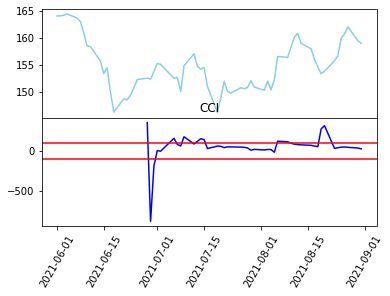

In [84]:
plt.figure(figsize=(12.5,5))
fig,(ax1,ax2)=plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)
plt.title("CCI")
ax1.plot(JPM.index, JPM["Adj Close"], color="skyblue")
ax2.plot(JPM.index, JPM["CCI"], color="b") 
ax2.axhline(100, color="r")
ax2.axhline(-100, color="r")
plt.xticks(rotation=60 )